#### We will be using customer churn data from the telecom industry.  We will load data, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics 

In [250]:
from __future__ import print_function 

import pandas as pd 
import matplotlib.pyplot as plt 
import os 

data_path = ['C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class2/data']

### Question 1 
* Begin by importing the data. Examine the columns and data. 
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data 

In [96]:
# Import data 
filepath = os.sep.join(data_path + ['Orange_Telecom_Churn_Data.csv'])
print (filepath)

data = pd.read_csv(filepath)
data.head(1) # grabs first entry 

C:/Users/japor/Desktop/Machine Learning 501 Nervana/Intel-ML101-Class2/data\Orange_Telecom_Churn_Data.csv


,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False


In [97]:
# remove extraneous columns 
data.drop(['state', 'area_code', 'phone_number'], 
          axis = 1, # drops column of above names, axis = 0 drops rows 
          inplace = True) # inplace = True modifies original data

In [ ]:
data.head(3)

In [99]:
# state, area code, and phone number are not indicators of customer 
# engagement with their current plans, and so are not likely good 
# features for predicting customer churn 
data.columns.tolist()

['account_length',
 'intl_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churned']

### Question 2 
* Notice that some of the columns are categorical data and some are floats.  These features will need to be numerically encoded using one of the methods from the lecture. 
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture. 


In [100]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

# test code 
lb.fit([1,2,3,4]) # FITS 4 output classes 
print (lb.classes_) # prints the 4 classes 
print(lb.transform([1,4])) # TRANSFORMS class 1 and 4 into binary vector 
print (lb.fit_transform([1,2,3,4])) # FITS and TRANSFORMS classes into binary vectors 

# Q2a - Transform categorical data to binary 
for col in ['intl_plan', 'voice_mail_plan', 'churned']: 
    data[col] = lb.fit_transform(data[col])


[1 2 3 4]
[[1 0 0 0]
 [0 0 0 1]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [112]:
# Q2b - Scale data using MinMaxScaler: scale by (max-min)

#import warnings
#warnings.filterwarnings('ignore', module = 'sklearn')

from sklearn.preprocessing import MinMaxScaler 

msc = MinMaxScaler()
data_msc = pd.DataFrame(msc.fit_transform(data), # np.array, not a dataframe
                    columns = data.columns)

data_msc.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0


In [113]:
# Scale using StandardScaler - removes mean and scales by unit variance 
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler()
data_stdsc = pd.DataFrame(stdsc.fit_transform(data), 
                          columns = data.columns)

data_stdsc.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.698941,-0.323240,1.667120,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676,-0.405816
1,0.169849,-0.323240,1.667120,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676,-0.405816
2,0.925695,-0.323240,-0.599837,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236,-0.405816
3,-0.409634,3.093675,-0.599837,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885,-0.405816
4,-0.636388,3.093675,-0.599837,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445,-0.405816


In [129]:
# Scale using MaxAbsScaler - scale each feature by its max absolute value 
from sklearn.preprocessing import MaxAbsScaler 

maxabs = MaxAbsScaler()
data_maxabs = pd.DataFrame(maxabs.fit_transform(data), 
                           columns = data.columns)

data_maxabs.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.526749,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.440329,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.563786,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.345679,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.308642,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333


### Question 3
* Separate the feature columns (everything except churned) from the label (churned). This will create two tables. 
* Fit a K-nearest neighbors model with a value of k=3 to this data and predict the outcome on the same data. 


In [154]:
# Q3a - (Used MinMaxScaled data) Separate feature columns from label (churned)

# Get a list of all columns that don't contain the label 
x_cols = [x for x in data_msc.columns if x != 'churned']

data_msc.head()
# Split the data into two dataframes 
X_data = data_msc[x_cols]
y_data = data_msc['churned']


# alternatively 
# X_data = data_msc.copy()
# y_data = X_data.pop('churned')

X_data.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333


In [207]:
# Q3b - Fit K-nearest neighbors model with k = 3, predict the outcome 
# on the same data 

from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

# all the wrong predictions 
wrong = [(y_pred[i], y_data[i]) for i in range(len(y_pred)) if y_pred[i] != y_data[i]]
len(wrong)

289

### Question 4
Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand - it is simply the percent of labels that were correctly predicted (either true or false) 
* Write a function to calculate accuracy using the actual and predicted labels 
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data 


In [208]:
# Q4 - Function to calculate % of values that were correctly predicted 

def accuracy(real, predict): 
    return sum(real == predict) / float(real.shape[0]) # or len(real)

accuracy(y_data, y_pred)

0.94220000000000004

### Question 5
* Fit the K-nearest neighbors model again with n_neighbors = 3 but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (p=1) i.e. Manhattan Distance 

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy.  Why do you think this is? Hint: we are predicting on the data and with KNN the model is the data. We will learn how to avoid this pitfall in the next lecture. 

In [209]:
# Q5a - Fit K-nearest neighbors with k=3, using distance as weights 

knn_dist = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn_dist = knn_dist.fit(X_data, y_data)

y_pred_dist = knn_dist.predict(X_data)

# accuracy
accuracy(y_data, y_pred_dist)

1.0

In [206]:
# Q5b - Fit K-nearest neighbors with k=3, using uniform weights, 
# power parameter for Minkowski distance metric p=1 (Manhattan Distance)

knn_p1 = KNeighborsClassifier(n_neighbors = 3, p = 1)
knn_p1 = knn_p1.fit(X_data, y_data)

y_pred_p1 = knn_p1.predict(X_data) 

# accuracy 
accuracy(y_data, y_pred_p1)


0.9456

### Question 6
* Fit a K-nearest neighbors model using values of k ranging from 1-20. Use uniform weights.  The coefficient for the Minkowski distance (p) can be set to either 1 or 2-just be consistent.  Store the accuracy and the value of k used from each of these fits in a list or dictionary. 
* Plot (or view the table of) the accuracy vs k. What do you notice happens when k=1? Why do you think this is? Hint: it's for the same reason discussed above. 

In [247]:
# Q6a - Fit K-nearest neighbors with k = 1 to 20, using uniform weights,
# p = 2 (Euclidean). Store accuracy and value of k in a list or dictionary 

knn_fits = {}
for k in range(1,21): 
    knn_p2 = KNeighborsClassifier(n_neighbors = k) 
    knn_p2 = knn_p2.fit(X_data, y_data) 
    y_pred_p2 = knn_p2.predict(X_data)
    
    knn_fits[k] = accuracy(y_data, y_pred_p2)
    

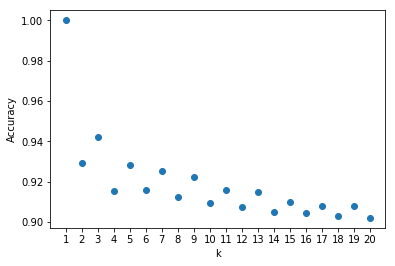

In [267]:
# Q6b - Plot accuracy vs. k 

% matplotlib inline
knn_fitsDF = pd.DataFrame(list(knn_fits.items()), columns = ['k', 'Accuracy'])

import matplotlib.pyplot as plt
plt.plot(knn_fitsDF.k, knn_fitsDF.Accuracy, ls = '', marker='o');

# np.arange gives evenly spaced values within given interval  
plt.xticks(np.arange(min(knn_fitsDF.k), 
                     max(knn_fitsDF.k)+1, 1.0)); 
plt.xlabel('k');
plt.ylabel('Accuracy');